# LULO BANK: Prueba de Seleccion

## (0) Importe de Librerias

In [2]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure

import requests
import json
from functools import reduce

import pandas_profiling as pp
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
import datetime

import sqlite3

## (1) Extraccion de datos desde una API

In [3]:
# Creacion de la lista de las fechas de interes:
date_list = []
for i in range(1,32):
     x = datetime.datetime(2020, 12, i)
     date_list.append(x.strftime('%Y-%m-%d'))

In [3]:
# Validacion de la lista de fechas
#date_list

In [4]:
# Creacion de la lista de las URLs donde se encuentran las APIs de interes:
url = 'http://api.tvmaze.com/schedule'
web = 'web?date='

API_ = []
List_url = []
for t in date_list:
    API_ = '{}/{}{}'.format(url, web, t)
    List_url.append(API_)

In [5]:
# Validacion de la lista de URLs:
# List_url

In [8]:
# Obtencion de DFs desde las APIs(URLs):

API_2 = []
List_txt = []
List_json = []
list_dfs = []
i = 0

for j in List_url:
   i = i + 1
   API_2 = requests.get(j)
   List_txt.append(API_2.text)
   json_file = json.loads(API_2.text)
   # Guardar un archivo json en cada loop 
   # (las proximas 3 lineas solo se deben correr una vez para extraer los archivos json):
   #out_file = open('{}{}.json'.format('date', i), 'w')   
   #json.dump(json_file, out_file, indent = 6) 
   #out_file.close()
   # Crea un lista de los archivos json y de alli 
   # los convierte  a DF para construir un listado de DFs: 
   List_json.append(json_file)
   df_all = json_normalize(json_file)
   list_dfs.append(df_all)

In [9]:
# Validacion de la lista de archivos json:
len(List_json)

31

In [8]:
# Validacion de la lista de DFs:
len(list_dfs)

31

## (2) Revision General de los datos extraidos

### (2.1) Revision de registros por dia (filas) y numero de variables (columnas)

In [9]:
# Conteo de filas y columnas:
rows = []
columns = []
for i in list_dfs:
    rows.append(len(i.axes[0]))
    columns.append(len(i.axes[1]))

In [10]:
# Convirtiendo listas en arrays:
rows = np.array(rows)
columns = np.array(columns)

In [11]:
# Reconfigurando el tamaño de cada array:
rows = np.reshape(rows,(31,1))
columns = np.reshape(columns,(31,1))


In [12]:
DFs = []
for k in range(1,32):
    DFs.append(k)

DFs = np.reshape(DFs,(31,1))


In [13]:
# Compilando los arrays en una lista y convirtiendola en array nuevamente:
fil_col = [DFs,rows,columns]
fil_col = np.array(fil_col)
fil_col = fil_col.T
fil_col.shape


(1, 31, 3)

In [14]:
# Pasando de ndarray 3D a un array 2D:
fil_col = fil_col.reshape(fil_col.shape[1], (fil_col.shape[0]*fil_col.shape[2]))

In [15]:
# Convirtiendo el array en DataFrame para mostrar los datos de mejor manera:
df_fil_col = pd.DataFrame(fil_col,columns = ['DFs','filas','columnas'])
#df_fil_col

In [16]:
# Revisando cuantas entradas hay por DF:
#df_fil_col['filas'].value_counts()
# Lo obtenido es esperado porque cada dia pueden haber mas o menos estrenos de series
# o se presentan un cierto numero de series segun el dia de la semana. 
# Se puede decir que en Diciembre el numero total de series registradas por dia en la API, 
# se repite maximo 1 vez al mes. Por lo general cada dia tiene su numero total de registros.

# Si es importante notar que el 01 de Diciembre del 2020 fue un Martes y el 31 de Diciembre fue un Jueves.
# Se nota un ciclo interesante entre la semana los Sabados y los Domingos son los dias en los que menos registros
# llegan a la API.  

In [17]:
# Cambiando de tipo de variable las columnas en el df_fil_col:
df_fil_col['filas']= df_fil_col['filas'].astype('int64')
df_fil_col['columnas']= df_fil_col['columnas'].astype('int64')

In [18]:
# Validando el df_fil_col resultante:
# df_fil_col

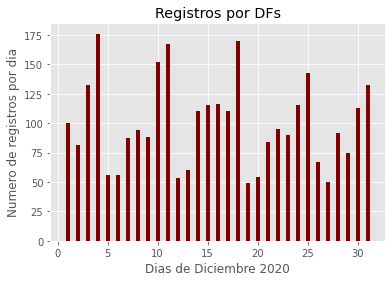

In [19]:
#plt.scatter(x=df_fil_col['DFs'], y=df_fil_col['filas'])
plt.bar(df_fil_col['DFs'], df_fil_col['filas'], color ='maroon',width = 0.4)
plt.title('Registros por DFs')
plt.xlabel('Dias de Diciembre 2020')
plt.ylabel('Numero de registros por dia')
plt.show()
# El grafico confirma la sospecha hay un ciclo con cada semana, donde por lo general los dias donde mas registros
# hay son los Jueves y Viernes. Mientras que los Lunes y Martes hay menos registros de las series de interes.

In [20]:
# Revisando cuantas variables se registran por DF:
df_fil_col['columnas'].value_counts()
# Se puede creer que casi todos los dias los registros ingresados tienen las mismas variables. 
# Los datos recogidos muestran que por lo general se registran 62 variables por cada entrada.
# Hay 8 dias en los que se registran 59 variables (o columnas).
# Ahora, se registran estas variables en el mismo orden?

62    23
59     8
Name: columnas, dtype: int64

In [21]:
# Revisando las componente 0 (2020-12-01), 2 (2020-12-03) y 6 (2020-12-07) de la lista list_dfs se pueden hacer comparaciones interesantes:
list_dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          100 non-null    int64  
 1   url                                         100 non-null    object 
 2   name                                        100 non-null    object 
 3   season                                      100 non-null    int64  
 4   number                                      100 non-null    int64  
 5   type                                        100 non-null    object 
 6   airdate                                     100 non-null    object 
 7   airtime                                     100 non-null    object 
 8   airstamp                                    100 non-null    object 
 9   runtime                                     94 non-null     float64
 10  image          

In [22]:
list_dfs[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          132 non-null    int64  
 1   url                                         132 non-null    object 
 2   name                                        132 non-null    object 
 3   season                                      132 non-null    int64  
 4   number                                      129 non-null    float64
 5   type                                        132 non-null    object 
 6   airdate                                     132 non-null    object 
 7   airtime                                     132 non-null    object 
 8   airstamp                                    132 non-null    object 
 9   runtime                                     116 non-null    float64
 10  image         

In [23]:
list_dfs[6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          87 non-null     int64  
 1   url                                         87 non-null     object 
 2   name                                        87 non-null     object 
 3   season                                      87 non-null     int64  
 4   number                                      86 non-null     float64
 5   type                                        87 non-null     object 
 6   airdate                                     87 non-null     object 
 7   airtime                                     87 non-null     object 
 8   airstamp                                    87 non-null     object 
 9   runtime                                     82 non-null     float64
 10  image           

Comparacion #1:

Comparando las componentes 0 con 2 de la lista list_dfs, vemos que a pesar que tienen los mismo numero de variables, el orden no es el mismo. En la componente 2 _embedded.show.webChannel es la variable #61 contando como #0 la 1ra variable, mientras que en la componente 0 aparece como la variable #56.

Comparacion #2:

Comparando la componente 6 con la componente 0 vemos que ahora hay 8 menos variables registradas y que el # asociado con la variable tambien cambia. En la componente 6 _embedded.show.webChannel es la ultima variable (#58).

Estas comparaciones confirman que los DFs que se vayan a utilizar para el analisis de los datos deben ser formados con variables que esten presentes en todos los DFs de Diciembre del 2020.  

### (2.2) Conteo de faltantes

In [24]:
nulos = []
for i in list_dfs:
    for col in i.columns:
        pct_missing = np.mean(i[col].isnull())
        nulos.append(('{} - {}'.format(col,np.round_(pct_missing,4))))

In [25]:
nulos

['id - 0.0',
 'url - 0.0',
 'name - 0.0',
 'season - 0.0',
 'number - 0.0',
 'type - 0.0',
 'airdate - 0.0',
 'airtime - 0.0',
 'airstamp - 0.0',
 'runtime - 0.06',
 'image - 1.0',
 'summary - 0.8',
 'rating.average - 0.97',
 '_links.self.href - 0.0',
 '_embedded.show.id - 0.0',
 '_embedded.show.url - 0.0',
 '_embedded.show.name - 0.0',
 '_embedded.show.type - 0.0',
 '_embedded.show.language - 0.0',
 '_embedded.show.genres - 0.0',
 '_embedded.show.status - 0.0',
 '_embedded.show.runtime - 0.29',
 '_embedded.show.averageRuntime - 0.04',
 '_embedded.show.premiered - 0.0',
 '_embedded.show.ended - 0.53',
 '_embedded.show.officialSite - 0.09',
 '_embedded.show.schedule.time - 0.0',
 '_embedded.show.schedule.days - 0.0',
 '_embedded.show.rating.average - 0.96',
 '_embedded.show.weight - 0.0',
 '_embedded.show.network - 1.0',
 '_embedded.show.webChannel.id - 0.07',
 '_embedded.show.webChannel.name - 0.07',
 '_embedded.show.webChannel.country.name - 0.61',
 '_embedded.show.webChannel.country.

Revisando cada DF registrado para cada dia de Diciembre 2020, se pueden destacar los siguientes puntos:

(i) Las primeras 10 variables estan casi todas completas. 

(ii) La variable Runtime esta entre un 2% y un 15% de datos faltantes.

(iii) De los datos embebidos para cada uno de los registros, genero es uno que siempre esta completo. Sin embargo, preocupan datos como rating.average o la informacion por pais que en su gran mayoria es nula. 

(iv) Una variable embebida que tiene poca cantidad de datos nulos es _embedded.show.averageRuntime importantisima para el analisis de los datos. 

### (2.3) Informacion mas importante para el cliente

La informacion mas importante para el cliente es: 

(i) average runtime por mes: Se encuentran los datos con pocos nulos.

(ii) serie emitidas por genero por mes: se encuentran los datos con pocos o sin datos faltantes.

(iii) porcentaje por pais de series emitidas por mes: se deben revisar en que casos esta la informacion del Pais.

(iv) rating promedio de series por pais y genero por mes: preocupante por la cantidad importante de datos nulos que hay relacionados a estas variables de interes.

## (3) Creacion y Revision de DataFrames

Con base en como estan los datos obtenidos de la API (filas y columnas), el numero de datos faltantes por cada variable registrada durante el periodo analizado (Diciembre 2020), y las variables de interes por parte del cliente se ha definido crear 5 diferentes Dataframes que contienen la informacion mas relevante para el cliente:

(3.1) Air Basic DF: ['id','url','name','season','type','airdate','airtime','airstamp']

(3.2) Genre-Status DF: ['id','_embedded.show.genres','_embedded.show.status','_embedded.show.premiered',
                      '_embedded.show.schedule.time','_embedded.show.schedule.days','_embedded.show.weight','_embedded.show.updated']

(3.3) Country DF: ['id','_embedded.show.webChannel.name','_embedded.show.webChannel.country.name',
                 '_embedded.show.webChannel.country.code','_embedded.show.webChannel.country.timezone']

(3.4) Runtime DF: ['id','runtime','_embedded.show.averageRuntime']

(3.5) Ratings DF: ['id','rating.average','_embedded.show.rating.average','_embedded.show.externals.imdb',
                 '_embedded.show.externals.tvrage','_embedded.show.externals.thetvdb']

### (3.1) Air Basic DF

#### (3.1.0) Compilacion del DF:

In [26]:
# Creacion de la lista de las fechas de interes:
list_air_basic = []
for i in list_dfs:
    list_air_basic.append(i[['id','url','name','season','type','airdate','airtime','airstamp']])

In [27]:
# Uniendo todos los data Frames en uno solo:
df_air_basic = pd.concat(list_air_basic, ignore_index=True)

#### (3.1.1) Revision basica del DF:

In [28]:
# info basica:
df_air_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3082 non-null   int64 
 1   url       3082 non-null   object
 2   name      3082 non-null   object
 3   season    3082 non-null   int64 
 4   type      3082 non-null   object
 5   airdate   3082 non-null   object
 6   airtime   3082 non-null   object
 7   airstamp  3082 non-null   object
dtypes: int64(2), object(6)
memory usage: 192.8+ KB


In [29]:
# Mirada general al df_air_basic:
# df_air_basic
# Se detecta la variable airtime hay valores que son ceros o vacios.

In [30]:
# Revision de los valores de 'airtime':
df_air_basic['airtime'].value_counts()
# Hay 2159 valores que no tienen un valor designado. 
# En este caso hay dos opciones, o 00:00 es el tiempo de airtime o se desconoce la hora exacta de 'airtime' para dichas series.
# Para este ejercicio la idea seria ponerles el tiempo 00:00

         2159
20:00     337
12:00     114
06:00      74
21:00      72
         ... 
22:20       1
09:15       1
09:30       1
21:55       1
21:45       1
Name: airtime, Length: 61, dtype: int64

In [31]:
# Revision de los valores de 'name':
df_air_basic['name'].value_counts().head(115)
# Existen nombre de series repetidos y especialmente aparecen series con nombre de 'Episode #'.
# Para validar si cada entrada de la variable name es unico, se debe unir con la columna 'season'.
# Ya que una misma serie puede tener varias temporadas que se hayan estrenado en un mismo canal (o diferentes canales) de tv durante Diciembre 2020. 
# Hay al menos 114 series que tienen el nombre repetido en el data set.

Episode 1            65
Episode 2            64
Episode 5            62
Episode 3            61
Episode 4            59
                     ..
Episode 56            2
Christmas Special     2
第133集                 2
Episode 80            2
Vinnytsia Region      1
Name: name, Length: 115, dtype: int64

In [32]:
# Revision de los valores de 'season':
df_air_basic['season'].value_counts()
# Todos los registros ingresados tienen una temporada asignada (season). 
# No hay datos nulos en temporada.

1       1891
2        354
2020     224
3        171
4        156
5         54
7         41
6         35
18        23
9         23
10        19
8         19
31        19
12         7
19         6
14         6
51         5
15         5
27         4
48         4
30         4
17         3
11         3
54         2
13         2
16         1
23         1
Name: season, dtype: int64

In [33]:
# Revision de los valores de 'type':
df_air_basic['type'].value_counts()
# Hay un desbalance entre categorias. El 97% de los datos ingresados pertenecen a la categoria 'regular'.

regular                  3001
significant_special        45
insignificant_special      36
Name: type, dtype: int64

In [34]:
# Revision de la variable 'url':
df_air_basic['url'].value_counts()
# cada una de las entradas es proveniente de una url diferente (no se repiten urls en el data set).  

https://www.tvmaze.com/episodes/1979824/sim-for-you-4x16-chanyeols-episode-16                          1
https://www.tvmaze.com/episodes/2068349/doomsday-awakening-2x01-episode-1                              1
https://www.tvmaze.com/episodes/2006162/roadkill-9x13-dirt-track-rally-shootout                        1
https://www.tvmaze.com/episodes/1980398/the-young-turks-2020-12-21-december-21-2020-hour-1             1
https://www.tvmaze.com/episodes/1980399/the-young-turks-2020-12-21-december-21-2020-hour-2             1
                                                                                                      ..
https://www.tvmaze.com/episodes/1910447/the-founder-of-diabolism-q-1x21-a-tutorial                     1
https://www.tvmaze.com/episodes/1998576/mr-right-is-here-1x05-episode-5                                1
https://www.tvmaze.com/episodes/1998577/mr-right-is-here-1x06-episode-6                                1
https://www.tvmaze.com/episodes/2013866/kl-gangster-und

#### (3.1.2) Mejoras del DF:

In [35]:
# Cambio de categorias antes de hacer el profiling:
# (i) las variables airdate y airstamp de object a datetime[ns]
# (ii) la variable type de object a category (int).
# (iii) unir las variables name y season. La variable resultante pasarla de object a category
# (iv) identificar el verdadero nombre de las series emitidas (el data set da el nombre de los episodios, pero no de las series)

In [36]:
# (i) las variables airdate, airtime, airstamp de object a datetime[ns]

In [37]:
df_air_basic['airdate'] = df_air_basic['airdate'].astype('datetime64[ns]')

In [38]:
df_air_basic['airstamp'] = df_air_basic['airstamp'].astype('datetime64[ns]')

In [39]:
# (ii) la variable type de object a category
df_air_basic['type'] = df_air_basic['type'].astype('category')
df_air_basic['type'] = df_air_basic['type'].cat.codes

In [40]:
df_air_basic['type'].value_counts()
# 0: insignificant_special
# 1: regular
# 2: significant_special
# con codigos numericos para cada categoria se puede revisar la correlacion entre variables 

1    3001
2      45
0      36
Name: type, dtype: int64

In [41]:
# (iii) Union 'name + season' y revision de duplicados:
# Adicionando una columna vacia al df_air_basic
df_air_basic.insert(8,'name_season','',True) 

In [42]:
# Cambiando la categoria de season:
df_air_basic['season'] = df_air_basic['season'].astype(str)

In [43]:
df_air_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           3082 non-null   int64         
 1   url          3082 non-null   object        
 2   name         3082 non-null   object        
 3   season       3082 non-null   object        
 4   type         3082 non-null   int8          
 5   airdate      3082 non-null   datetime64[ns]
 6   airtime      3082 non-null   object        
 7   airstamp     3082 non-null   datetime64[ns]
 8   name_season  3082 non-null   object        
dtypes: datetime64[ns](2), int64(1), int8(1), object(5)
memory usage: 195.8+ KB


In [44]:
# Uniendo dos columnas en una:
#df_air_basic[['name_season']] = df_air_basic[['name']] +'-'+df_air_basic[['season']].astype(str)
df_air_basic['name_season'] = df_air_basic[['name', 'season']].apply("-".join, axis=1)

In [45]:
# validacion:
df_air_basic

,id,url,name,season,type,airdate,airtime,airstamp,name_season
0,1979824,https://www.tvmaze.com/episodes/1979824/sim-fo...,Chanyeol's Episode 16,4,1,2020-12-01,06:00,2020-11-30 21:00:00,Chanyeol's Episode 16-4
1,1979222,https://www.tvmaze.com/episodes/1979222/kotiki...,Серия 2,1,1,2020-12-01,,2020-12-01 00:00:00,Серия 2-1
2,2008027,https://www.tvmaze.com/episodes/2008027/lab-s-...,Лолита,2,1,2020-12-01,,2020-12-01 00:00:00,Лолита-2
3,1964565,https://www.tvmaze.com/episodes/1964565/core-s...,Episode 9,1,1,2020-12-01,10:00,2020-12-01 02:00:00,Episode 9-1
4,2052503,https://www.tvmaze.com/episodes/2052503/wu-she...,Episode 80,1,1,2020-12-01,10:00,2020-12-01 02:00:00,Episode 80-1
...,...,...,...,...,...,...,...,...,...
3077,2005098,https://www.tvmaze.com/episodes/2005098/carl-w...,The Nuclear Option,2,1,2020-12-31,21:00,2021-01-01 02:00:00,The Nuclear Option-2
3078,2005099,https://www.tvmaze.com/episodes/2005099/carl-w...,Mothers and Their Sons,2,1,2020-12-31,21:00,2021-01-01 02:00:00,Mothers and Their Sons-2
3079,2005100,https://www.tvmaze.com/episodes/2005100/carl-w...,I Don't Want to Lose My Queen,2,1,2020-12-31,21:00,2021-01-01 02:00:00,I Don't Want to Lose My Queen-2
3080,2005101,https://www.tvmaze.com/episodes/2005101/carl-w...,Deploy the Drones,2,1,2020-12-31,21:00,2021-01-01 02:00:00,Deploy the Drones-2


In [46]:
df_air_basic[['name_season']].value_counts()
# Hay al menos 117 series que se repiten en el data set.
# Para set de datos hay una serie con nombre Episode 1-1 que se repite 54 veces. 
# Pero este mensaje puede ser erroneo porque Episode 1-1 puede que pertenezca a 54 series diferentes.
# Por ello se debe extraer la ultima parte de la url que tiene el nombre real de la serie+season+episode+time

name_season 
Episode 1-1     54
Episode 2-1     52
Episode 3-1     51
Episode 5-1     51
Episode 4-1     50
                ..
Episode 80-1     1
Episode 8-6      1
Episode 79-4     1
Episode 78-4     1
희대의 탄생-1         1
Length: 2211, dtype: int64

In [47]:
# Columna nueva donde se pondra el nombre completo de la serie extraido de la url:
df_air_basic.insert(9,'name_complete','',True)

In [48]:
# Extraccion de la informacion completa de la serie:
for i in range(0,len(df_air_basic['url'])):
        trail = df_air_basic['url'].loc[i].split("/")[-1:]
        df_air_basic['name_complete'].loc[i] = trail[0]


In [49]:
# Posible duplicados: 
df_air_basic[['name_complete']].value_counts()

name_complete                                                                                             
blippi-2020-12-24-learning-in-the-holidays-with-blippi-1-hour-of-blippi-educational-videos-for-kids           2
blippi-2020-12-17-blippi-visits-the-horse-and-reindeer-farm-animals-for-kids                                  2
blippi-2020-12-10-learning-how-to-snowboard-with-blippi-winter-holiday-videos-for-kids                        2
0-z-majklom-surom-5x14-potap-vs-morgenshtern-poplavskij-i-maacna-zelenskij-i-korupcia-0-z-majklom-surom-14    1
sj-returns-4x77-episode-77                                                                                    1
                                                                                                             ..
helluva-boss-1x02-loo-loo-land                                                                                1
helt-perfekt-11x10-tidsvinduet                                                                               

In [50]:
# Columna nueva donde se pondra el nombre verdadero de la serie:
df_air_basic.insert(10,'serie_name_true','',True)

In [51]:
# Extraccion de el nombre verdadero de cada serie:
for i in range(0,len(df_air_basic['name_complete'])):
        trail = df_air_basic['name_complete'].loc[i]
        c ='x'
        count = trail.count(c)
        if count == 0 :
             count_2 = trail.count('2020')  
             if count_2 >= 1:
                df_air_basic['serie_name_true'].loc[i] = trail[0:6:1] 
             else:      
                df_air_basic['serie_name_true'].loc[i] = trail[0:18:1] 
        elif count == 1:
             find_val = trail.find(c)
             if find_val <= 1:
                df_air_basic['serie_name_true'].loc[i] = trail[0:15:1] 
             else:
                df_air_basic['serie_name_true'].loc[i] = trail[0:(find_val-1):1]
        else:  
             index_h = trail.rindex('x')
             index_l = trail.index('x')
             if index_l <=1:
                  df_air_basic['serie_name_true'].loc[i] = trail[0:index_h:1] 
             elif index_h > 15:
                df_air_basic['serie_name_true'].loc[i] = trail[0:index_l:1]
             else:
                df_air_basic['serie_name_true'].loc[i] = trail[0:index_h:1]  

In [52]:
# Cuantas veces se repite una misma serie:
df_air_basic['serie_name_true'].value_counts().head(506)

the-yo                   38
scisho                   34
90-day-fiance-e          32
the-penalty-zone-        30
twisted-fate-of-love-    29
                         ..
all-the-queens-men-       2
tv-2-hjelper-deg-5        2
kuntergrau-               2
panele                    2
edgar-1                   1
Name: serie_name_true, Length: 506, dtype: int64

In [53]:
# Organizando las filas con base en elnombre de la serie:
df_air_basic.sort_values(by="serie_name_true", ascending=True)

,id,url,name,season,type,airdate,airtime,airstamp,name_season,name_complete,serie_name_true
861,2014651,https://www.tvmaze.com/episodes/2014651/0-z-ma...,Референдум! Потрібен він комусь чи? ЩЕ з Максо...,5,0,2020-12-09,20:30,2020-12-09 18:30:00,Референдум! Потрібен він комусь чи? ЩЕ з Максо...,0-z-majklom-surom-s05-special-referendum-potri...,0-z-majklom-surom-
1997,1985088,https://www.tvmaze.com/episodes/1985088/0-z-ma...,Переможці Паляниця Awards-2020! /// Зеленський...,5,1,2020-12-20,14:00,2020-12-20 12:00:00,Переможці Паляниця Awards-2020! /// Зеленський...,0-z-majklom-surom-5x16-peremozci-palanica-awar...,0-z-majklom-surom-
1270,1967756,https://www.tvmaze.com/episodes/1967756/0-z-ma...,"Cyberpunk 2077, справа Шеремета, Marvel, Палян...",5,1,2020-12-13,14:00,2020-12-13 12:00:00,"Cyberpunk 2077, справа Шеремета, Marvel, Палян...",0-z-majklom-surom-5x15-cyberpunk-2077-sprava-s...,0-z-majklom-surom-
570,1967755,https://www.tvmaze.com/episodes/1967755/0-z-ma...,"Потап VS Morgenshtern, Поплавський і маячня, З...",5,1,2020-12-06,14:00,2020-12-06 12:00:00,"Потап VS Morgenshtern, Поплавський і маячня, З...",0-z-majklom-surom-5x14-potap-vs-morgenshtern-p...,0-z-majklom-surom-
2863,2007593,https://www.tvmaze.com/episodes/2007593/10-bin...,Yalan,1,1,2020-12-30,,2020-12-30 09:00:00,Yalan-1,10-bin-adim-1x02-yalan,10-bin-adim-
...,...,...,...,...,...,...,...,...,...,...,...
1200,2212166,https://www.tvmaze.com/episodes/2212166/zombet...,7 серия,1,1,2020-12-12,,2020-12-12 07:00:00,7 серия-1,zombety-1x07-7-seria,zombety-
1936,2212167,https://www.tvmaze.com/episodes/2212167/zombet...,8 серия,1,1,2020-12-19,,2020-12-19 07:00:00,8 серия-1,zombety-1x08-8-seria,zombety-
486,1978323,https://www.tvmaze.com/episodes/1978323/zombie...,Disney Holiday Magic Quest,2020,0,2020-12-04,20:00,2020-12-05 01:00:00,Disney Holiday Magic Quest-2020,zombies-2020-special-disney-holiday-magic-quest,zombie
487,1965175,https://www.tvmaze.com/episodes/1965175/zombie...,Feelin' the Power,1,1,2020-12-04,21:15,2020-12-05 02:15:00,Feelin' the Power-1,zombies-addisons-monster-mystery-1x08-feelin-t...,zombies-addisons-monster-mystery-


In [54]:
# Columna nueva donde se pondra la categoria segun el nombre verdadero de la serie:
df_air_basic.insert(11,'serie_name_true_cat','',True)
# df_air_basic.drop('serie_name_true_cat', axis=1, inplace=True)

In [55]:
# Alimentando la nueva columna serie_name_true_cat:
for i in range(0,len(df_air_basic['serie_name_true'])):
        df_air_basic['serie_name_true_cat'].loc[i] =df_air_basic['serie_name_true'].loc[i]

In [56]:
# Cambiando la tipo de variable para la columna serie_name_true_cat:
df_air_basic['serie_name_true_cat'] = df_air_basic['serie_name_true_cat'].astype('category')
df_air_basic['serie_name_true_cat'] = df_air_basic['serie_name_true_cat'].cat.codes

In [57]:
#Validacion
#df_air_basic

In [58]:
# Cambiando categorias para cerrar el DF modificado:
df_air_basic['serie_name_true_cat'] = df_air_basic['serie_name_true_cat'].astype(int)
df_air_basic['season'] = df_air_basic['season'].astype(int)

In [59]:
# Validacion:
df_air_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   3082 non-null   int64         
 1   url                  3082 non-null   object        
 2   name                 3082 non-null   object        
 3   season               3082 non-null   int32         
 4   type                 3082 non-null   int8          
 5   airdate              3082 non-null   datetime64[ns]
 6   airtime              3082 non-null   object        
 7   airstamp             3082 non-null   datetime64[ns]
 8   name_season          3082 non-null   object        
 9   name_complete        3082 non-null   object        
 10  serie_name_true      3082 non-null   object        
 11  serie_name_true_cat  3082 non-null   int32         
dtypes: datetime64[ns](2), int32(2), int64(1), int8(1), object(6)
memory usage: 243.9+ KB


In [60]:
# Extraccion a excel del DataFrame obtenido (df_air_org) para revision detallada:
# df_air_org.to_excel(r'df_air_org.xlsx', index = False)
# Hay algunas lineas que todavia se pueden pulir un poco mas pero son contados y puntuales los casos.

#### (3.1.3) Profiling antes de cleaning:

In [61]:
# Profiling
#pfile_df_air_basic = pp.ProfileReport(df_air_basic)
#pfile_df_air_basic.to_file(output_file="df_air_basic.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### (3.2) Genre-Status DF

#### (3.2.0) Compilacion del DF:

In [62]:
list_genre_status = []
for i in list_dfs:
    list_genre_status.append(i[['id','_embedded.show.genres','_embedded.show.status','_embedded.show.premiered',
                       '_embedded.show.schedule.time','_embedded.show.schedule.days','_embedded.show.weight','_embedded.show.updated']])

In [63]:
# Uniendo todos los data Frames en uno solo:
df_genre_status = pd.concat(list_genre_status, ignore_index=True)

In [64]:
# Adicion de las columnas que permitaran hacer Join entre diferentes DFs:
df_genre_status.insert(8,'serie_name_true','',True) 
df_genre_status.insert(9,'serie_name_true_cat','', True)

In [65]:
# Alimentando de valores las columnas creadas:
for i in range(0,len(df_genre_status['_embedded.show.genres'])):
    df_genre_status['serie_name_true'].loc[i] = df_air_basic['serie_name_true'].loc[i]
    df_genre_status['serie_name_true_cat'].loc[i] = df_air_basic['serie_name_true_cat'].loc[i]

#### (3.2.1) Revision basica del DF:

In [66]:
# info basica:
df_genre_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            3082 non-null   int64 
 1   _embedded.show.genres         3082 non-null   object
 2   _embedded.show.status         3082 non-null   object
 3   _embedded.show.premiered      3082 non-null   object
 4   _embedded.show.schedule.time  3082 non-null   object
 5   _embedded.show.schedule.days  3082 non-null   object
 6   _embedded.show.weight         3082 non-null   int64 
 7   _embedded.show.updated        3082 non-null   int64 
 8   serie_name_true               3082 non-null   object
 9   serie_name_true_cat           3082 non-null   object
dtypes: int64(3), object(7)
memory usage: 240.9+ KB


#### (3.2.2) Mejoras del DF:

In [67]:
# Ajustamos el tipo de la variable 'serie_name_true_cat' y '_embedded.show.premiered':
df_genre_status['serie_name_true_cat'] = df_genre_status['serie_name_true_cat'].astype(int)
df_genre_status['_embedded.show.premiered'] = df_genre_status['_embedded.show.premiered'].astype('datetime64[ns]')


In [68]:
# Cambiar a categoria las variables genre y status:
# Generar las dos columnas nuevas donde se alimentaran los datos:
df_genre_status.insert(10,'serie_genre','',True) 
df_genre_status.insert(11,'serie_status','',True)
df_genre_status.insert(12,'genre_true','',True)

In [69]:
# Alimentar las dos columnas nuevas con los datos modificados:
trail = []
for i in range(0, len(df_genre_status['_embedded.show.genres'])):
     trail = df_genre_status['_embedded.show.genres'].loc[i]
     if trail == []:
        df_genre_status['serie_genre'].loc[i] = ''
     else:
        df_genre_status['serie_genre'].loc[i] = trail[0]
     
     df_genre_status['serie_status'].loc[i] = df_genre_status['_embedded.show.status'].loc[i]

In [70]:
trail = []
for i in range(0, len(df_genre_status['_embedded.show.genres'])):
     trail = df_genre_status['_embedded.show.genres'].loc[i]
     if trail == []:
        df_genre_status['genre_true'].loc[i] = ''
     else:
        df_genre_status['genre_true'].loc[i] = trail[0]

In [71]:
# Validacion:
# df_genre_status

In [72]:
df_genre_status['serie_genre'] = df_genre_status['serie_genre'].astype('category')
df_genre_status['serie_genre'] = df_genre_status['serie_genre'].cat.codes

df_genre_status['serie_status'] = df_genre_status['serie_status'].astype('category')
df_genre_status['serie_status'] = df_genre_status['serie_status'].cat.codes

In [73]:
# Validacion:
df_genre_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            3082 non-null   int64         
 1   _embedded.show.genres         3082 non-null   object        
 2   _embedded.show.status         3082 non-null   object        
 3   _embedded.show.premiered      3082 non-null   datetime64[ns]
 4   _embedded.show.schedule.time  3082 non-null   object        
 5   _embedded.show.schedule.days  3082 non-null   object        
 6   _embedded.show.weight         3082 non-null   int64         
 7   _embedded.show.updated        3082 non-null   int64         
 8   serie_name_true               3082 non-null   object        
 9   serie_name_true_cat           3082 non-null   int32         
 10  serie_genre                   3082 non-null   int8          
 11  serie_status                  

#### (3.2.3) Profiling antes de cleaning:

In [74]:
# Profiling
# pfile_df_genre_status = pp.ProfileReport(df_genre_status)
# pfile_df_genre_status.to_file(output_file="df_genre_status.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### (3.3) Country DF

#### (3.3.0) Compilacion del DF:

In [75]:
list_country = []
for i in list_dfs:
    list_country.append(i[['id','_embedded.show.webChannel.name','_embedded.show.webChannel.country.name',
                 '_embedded.show.webChannel.country.code','_embedded.show.webChannel.country.timezone']])

In [76]:
# Uniendo todos los data Frames en uno solo:
df_country = pd.concat(list_country, ignore_index=True)

In [77]:
# Adicion de las columnas que permitaran hacer Join entre diferentes DFs:
df_country.insert(5,'serie_name_true','',True) 
df_country.insert(6,'serie_name_true_cat','', True)

In [78]:
# Alimentando los datos en las columnas agregadas:
for i in range(0,len(df_country['_embedded.show.webChannel.name'])):
    df_country['serie_name_true'].loc[i] = df_air_basic['serie_name_true'].loc[i]
    df_country['serie_name_true_cat'].loc[i] = df_air_basic['serie_name_true_cat'].loc[i]

#### (3.3.1) Revision basica del DF

In [79]:
# info basica:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   id                                          3082 non-null   int64 
 1   _embedded.show.webChannel.name              2997 non-null   object
 2   _embedded.show.webChannel.country.name      1509 non-null   object
 3   _embedded.show.webChannel.country.code      1509 non-null   object
 4   _embedded.show.webChannel.country.timezone  1509 non-null   object
 5   serie_name_true                             3082 non-null   object
 6   serie_name_true_cat                         3082 non-null   object
dtypes: int64(1), object(6)
memory usage: 168.7+ KB


#### (3.3.2) Mejoras del DF:

In [80]:
df_country['_embedded.show.webChannel.country.name'] = df_country['_embedded.show.webChannel.country.name'].astype(str)
df_country['_embedded.show.webChannel.country.code'] = df_country['_embedded.show.webChannel.country.code'].astype(str)

df_country['serie_name_true_cat'] = df_country['serie_name_true_cat'].astype(int)

#### (3.3.3) Profiling antes de cleaning:

In [81]:
# Profiling:
# pfile_df_country = pp.ProfileReport(df_country)
# pfile_df_country.to_file(output_file="df_country.html")

### (3.4) Runtime DF

#### (3.4.0) Compilacion del DF:

In [82]:
list_runtime = []
for i in list_dfs:
    list_runtime.append(i[['id','runtime','_embedded.show.averageRuntime']])

In [83]:
# Uniendo todos los data Frames en uno solo:
df_runtime = pd.concat(list_runtime, ignore_index=True)

In [84]:
df_runtime.insert(3,'serie_name_true','',True) 
df_runtime.insert(4,'serie_name_true_cat','', True)

In [85]:
for i in range(0,len(df_runtime['runtime'])):
    df_runtime['serie_name_true'].loc[i] = df_air_basic['serie_name_true'].loc[i]
    df_runtime['serie_name_true_cat'].loc[i] = df_air_basic['serie_name_true_cat'].loc[i]

#### (3.4.1) Revision basica del DF:

In [86]:
# info basica:
df_runtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3082 non-null   int64  
 1   runtime                        2854 non-null   float64
 2   _embedded.show.averageRuntime  2913 non-null   float64
 3   serie_name_true                3082 non-null   object 
 4   serie_name_true_cat            3082 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 120.5+ KB


#### (3.4.2) Mejoras del DF:

In [87]:
df_runtime['serie_name_true_cat'] = df_runtime['serie_name_true_cat'].astype(int)

#### (3.4.3) Profiling antes de cleaning:

In [88]:
# pp.ProfileReport(df_runtime)
# pfile_df_runtime = pp.ProfileReport(df_runtime)
# pfile_df_runtime.to_file(output_file="df_runtime.html")

### (3.5) Ratings DF

#### (3.5.0) Compilacion del DF:

In [89]:
list_ratings = []
for i in list_dfs:
    list_ratings.append(i[['id','rating.average','_embedded.show.rating.average','_embedded.show.externals.imdb',
                 '_embedded.show.externals.tvrage','_embedded.show.externals.thetvdb']])

In [90]:
# Uniendo todos los data Frames en uno solo:
df_ratings = pd.concat(list_ratings, ignore_index=True)

In [91]:
df_ratings.insert(6,'serie_name_true','',True) 
df_ratings.insert(7,'serie_name_true_cat','', True)

In [92]:
for i in range(0,len(df_ratings['rating.average'])):
    df_ratings['serie_name_true'].loc[i] = df_air_basic['serie_name_true'].loc[i]
    df_ratings['serie_name_true_cat'].loc[i] = df_air_basic['serie_name_true_cat'].loc[i]

#### (3.5.1) Revision basica del DF:

In [93]:
# info basica:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3082 non-null   int64  
 1   rating.average                    296 non-null    float64
 2   _embedded.show.rating.average     421 non-null    float64
 3   _embedded.show.externals.imdb     1611 non-null   object 
 4   _embedded.show.externals.tvrage   57 non-null     float64
 5   _embedded.show.externals.thetvdb  2166 non-null   float64
 6   serie_name_true                   3082 non-null   object 
 7   serie_name_true_cat               3082 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 192.8+ KB


In [94]:
df_ratings

,id,rating.average,_embedded.show.rating.average,_embedded.show.externals.imdb,_embedded.show.externals.tvrage,_embedded.show.externals.thetvdb,serie_name_true,serie_name_true_cat
0,1979824,NaN,NaN,None,NaN,361541.0,sim-for-you-,493
1,1979222,NaN,NaN,None,NaN,392682.0,kotiki-,305
2,2008027,NaN,NaN,None,NaN,NaN,lab-s-antonom-belaevym-,312
3,1964565,NaN,NaN,None,NaN,NaN,core-sense-,119
4,2052503,NaN,NaN,None,NaN,379070.0,wu-shen-zhu-zai-,664
...,...,...,...,...,...,...,...,...
3077,2005098,NaN,5.0,tt7146326,NaN,NaN,carl-webers-the-family-business-,95
3078,2005099,NaN,5.0,tt7146326,NaN,NaN,carl-webers-the-family-business-,95
3079,2005100,NaN,5.0,tt7146326,NaN,NaN,carl-webers-the-family-business-,95
3080,2005101,NaN,5.0,tt7146326,NaN,NaN,carl-webers-the-family-business-,95


#### (3.5.2) Mejoras del DF:

In [95]:
df_ratings['serie_name_true_cat'] = df_ratings['serie_name_true_cat'].astype(int)

#### (3.5.3) Profiling antes de cleaning:

In [96]:
# pfile_df_ratings = pp.ProfileReport(df_ratings)
# pfile_df_ratings.to_file(output_file="df_ratings.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## (4) DFs Cleaning y Profiling

In [97]:
# Renombrar las columnas:
df_air_basic.rename(columns = {'id':'id_unico', 'name':'Episodio', 'season':'Temporada','type':'Tipo',
                               'airdate':'Fecha_alaire','serie_name_true':'Serie','serie_name_true_cat':'id_Serie' }, inplace = True)

In [98]:
df_genre_status.rename(columns = {'id':'id_unico', '_embedded.show.status':'Estado',
                               '_embedded.show.premiered':'Premier','serie_name_true':'Serie','serie_name_true_cat':'id_Serie',
                               'serie_genre':'id_Genero','serie_status':'id_Estado','genre_true':'Genero' }, inplace = True)

In [99]:
df_country.rename(columns = {'id':'id_unico', '_embedded.show.webChannel.country.name':'Pais', '_embedded.show.webChannel.country.code':'Sigla_Pais',
                               'serie_name_true':'Serie','serie_name_true_cat':'id_Serie'}, inplace = True)

In [100]:
df_runtime.rename(columns = {'id':'id_unico','serie_name_true':'Serie','serie_name_true_cat':'id_Serie','_embedded.show.averageRuntime':'Avg_runtime'}, inplace = True)

In [101]:
df_ratings.rename(columns = {'id':'id_unico','serie_name_true':'Serie','serie_name_true_cat':'id_Serie',
                             'rating.average':'Avg_rating','_embedded.show.rating.average':'E_Avg_rating'}, inplace = True)

In [102]:
df_genre_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id_unico                      3082 non-null   int64         
 1   _embedded.show.genres         3082 non-null   object        
 2   Estado                        3082 non-null   object        
 3   Premier                       3082 non-null   datetime64[ns]
 4   _embedded.show.schedule.time  3082 non-null   object        
 5   _embedded.show.schedule.days  3082 non-null   object        
 6   _embedded.show.weight         3082 non-null   int64         
 7   _embedded.show.updated        3082 non-null   int64         
 8   Serie                         3082 non-null   object        
 9   id_Serie                      3082 non-null   int32         
 10  id_Genero                     3082 non-null   int8          
 11  id_Estado                     

In [103]:
# Renombrar dfs que se guardaran en la base de datos:
df_id_unico_db = df_air_basic.iloc[:,[0,11,10,9]]
df_air_basic_db = df_air_basic.iloc[:,[5,11,10,9,3,2,4,1]]
df_genre_status_db = df_genre_status.iloc[:,[0,9,8,10,12,11,2,3]]
df_country_db = df_country.iloc[:,[0,6,5,2,3]]
df_runtime_db = df_runtime.iloc[:,[0,4,3,1,2]]
df_ratings_db = df_ratings.iloc[:,[0,7,6,1,2]]

In [104]:
# Drop duplicates:
df_air_basic_db = df_air_basic_db.drop_duplicates()
df_air_basic_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082 entries, 0 to 3081
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha_alaire   3082 non-null   datetime64[ns]
 1   id_Serie       3082 non-null   int32         
 2   Serie          3082 non-null   object        
 3   name_complete  3082 non-null   object        
 4   Temporada      3082 non-null   int32         
 5   Episodio       3082 non-null   object        
 6   Tipo           3082 non-null   int8          
 7   url            3082 non-null   object        
dtypes: datetime64[ns](1), int32(2), int8(1), object(4)
memory usage: 171.6+ KB


In [105]:
# Borrar datos nulos:
df_id_unico_db_VF = df_id_unico_db.dropna() 
df_air_basic_db_VF = df_air_basic_db.dropna()
df_genre_status_db_VF = df_genre_status_db.dropna()
df_country_db_VF = df_country_db.dropna()
df_runtime_db_VF = df_runtime_db.dropna()
df_ratings_db_VF = df_ratings_db.dropna()

### (4.1) Profiling despues de Cleaning:

In [106]:
# Profiling:
pfile_df_air_basic_db_VF = pp.ProfileReport(df_air_basic_db_VF)
pfile_df_air_basic_db_VF.to_file(output_file="df_air_basic_db_VF.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
pfile_df_genre_status_db_VF = pp.ProfileReport(df_genre_status_db_VF)
pfile_df_genre_status_db_VF.to_file(output_file="df_genre_status_db_VF.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [108]:
pfile_df_country_db_VF = pp.ProfileReport(df_country_db_VF)
pfile_df_country_db_VF.to_file(output_file="df_country_db_VF.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
pfile_df_runtime_db_VF = pp.ProfileReport(df_runtime_db_VF)
pfile_df_runtime_db_VF.to_file(output_file="df_runtime_db_VF.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
pfile_df_ratings_db_VF = pp.ProfileReport(df_ratings_db_VF)
pfile_df_ratings_db_VF.to_file(output_file="df_ratings_db_VF.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## (5) DFs a SQLite

In [111]:
# Creacion de la base de datos:
db = "tvseries_2020-12.sqlite"
conn = sqlite3.connect(db)
cursor = conn.cursor()

In [112]:
# Guardando DFs in sqlite database:
# df_id_unico_db_VF.to_sql(name='id_unico', con=conn)
# df_air_basic_db_VF.to_sql(name='air_basic', con=conn)
# df_genre_status_db_VF.to_sql(name='genre_status', con=conn)

# Nota: Se corre solo la primera vez. 
# Luego de guardadas en la base datos no se necesitan volver a subir. 

In [115]:
# df_country_db_VF.to_sql(name='country', con=conn)
# df_runtime_db_VF.to_sql(name='runtime', con=conn)
# df_ratings_db_VF.to_sql(name='ratings', con=conn)

In [116]:
cursor.execute('SELECT id_serie, Serie, Avg_rating From ratings')
cursor.fetchall()

[(558, 'the-holiday-movies-that-made-us-', 7.5),
 (26, 'a-teacher-', 7.7),
 (36, 'alien-worlds-', 7.3),
 (36, 'alien-worlds-', 9.0),
 (36, 'alien-worlds-', 9.0),
 (36, 'alien-worlds-', 10.0),
 (486, 'serlok-v-rossii-', 8.0),
 (653, 'why-r-u-the-series-', 6.7),
 (508, 'star-trek-discovery-', 7.8),
 (550, 'the-flight-attendant-', 7.7),
 (550, 'the-flight-attendant-', 8.0),
 (399, 'oh-mando-', 10.0),
 (327, 'looney-tunes-cartoons-', 9.5),
 (327, 'looney-tunes-cartoons-', 9.5),
 (327, 'looney-tunes-cartoons-', 9.5),
 (327, 'looney-tunes-cartoons-', 9.5),
 (327, 'looney-tunes-cartoons-', 10.0),
 (73, 'big-mouth-', 9.0),
 (73, 'big-mouth-', 8.7),
 (73, 'big-mouth-', 8.8),
 (73, 'big-mouth-', 8.7),
 (73, 'big-mouth-', 8.5),
 (73, 'big-mouth-', 8.8),
 (73, 'big-mouth-', 8.6),
 (73, 'big-mouth-', 8.8),
 (73, 'big-mouth-', 8.2),
 (73, 'big-mouth-', 8.8),
 (561, 'the-mandalorian-', 9.0),
 (656, 'wish-you-', 9.0),
 (656, 'wish-you-', 9.0),
 (557, 'the-hardy-boys-', 7.0),
 (557, 'the-hardy-boys-', 

In [ ]:
conn.close()

## (6) ETL

In [ ]:
# Creacion del archivo config.py
# Creacion del archivo tv_series_db.py
# Resultados transformado y cargados a un archivo 'tv_series_db.csv'
# Archivos adjuntos al proyecto